In [25]:
%pip install pandas seaborn matplotlib numpy scikit-learn scipy lapack plotly
#ML USED
#Linear Regression, Random Forest, Logistic Regression

ERROR: Could not find a version that satisfies the requirement lapack (from versions: none)
ERROR: No matching distribution found for lapack
Note: you may need to restart the kernel to use updated packages.


In [2]:
#some mac specific fixes I had to make for this code to run
!conda install --force-reinstall scipy -y
!conda install -c conda-forge lapack -y
!conda install -c conda-forge openblas -y
import os
os.environ['DYLD_FALLBACK_LIBRARY_PATH'] = f"{os.environ.get('CONDA_PREFIX')}/lib"

Channels:
 - conda-forge
 - defaults
 - anaconda
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scipy





Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Channels:
 - conda-forge
 - defaults
 - anaconda
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.

Channels:
 - conda-forge
 - defaults
 - anaconda
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

In [5]:
# Display the first few rows of the dataset
print(df.head())
print('SUMMARY')
# Get a summary of the dataset
print(df.info())
print('DESCRIPTIVE STATS')
# Get descriptive statistics
print(df.describe())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
# Fill missing values for numeric columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values (result should be all 0s)
print(df.isnull().sum()) 

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


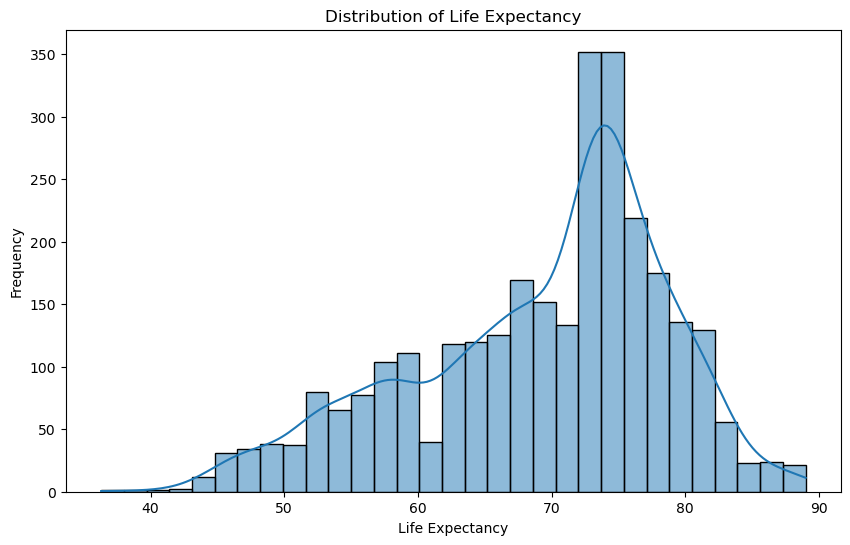

In [8]:
# Distribution of Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Life Expectancy by Country Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title('Life Expectancy by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()

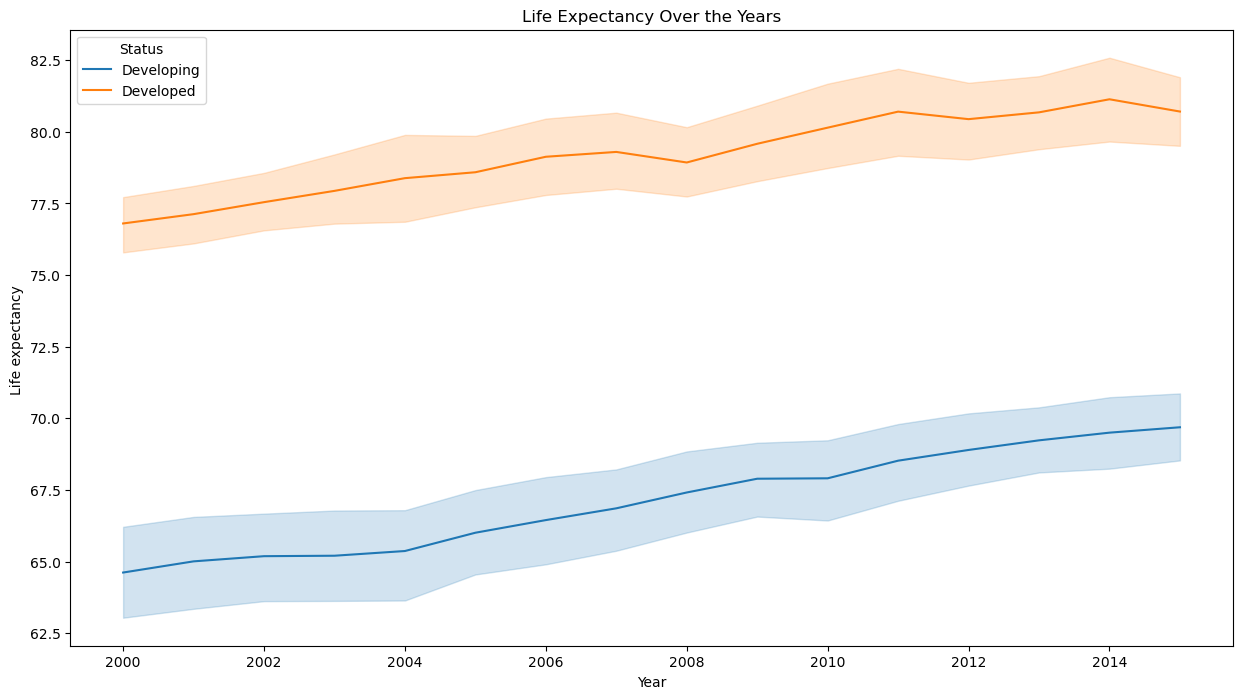

In [10]:
# Line plot for life expectancy over the years
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Life expectancy ', hue='Status', data=df)
plt.title('Life Expectancy Over the Years')
plt.show()

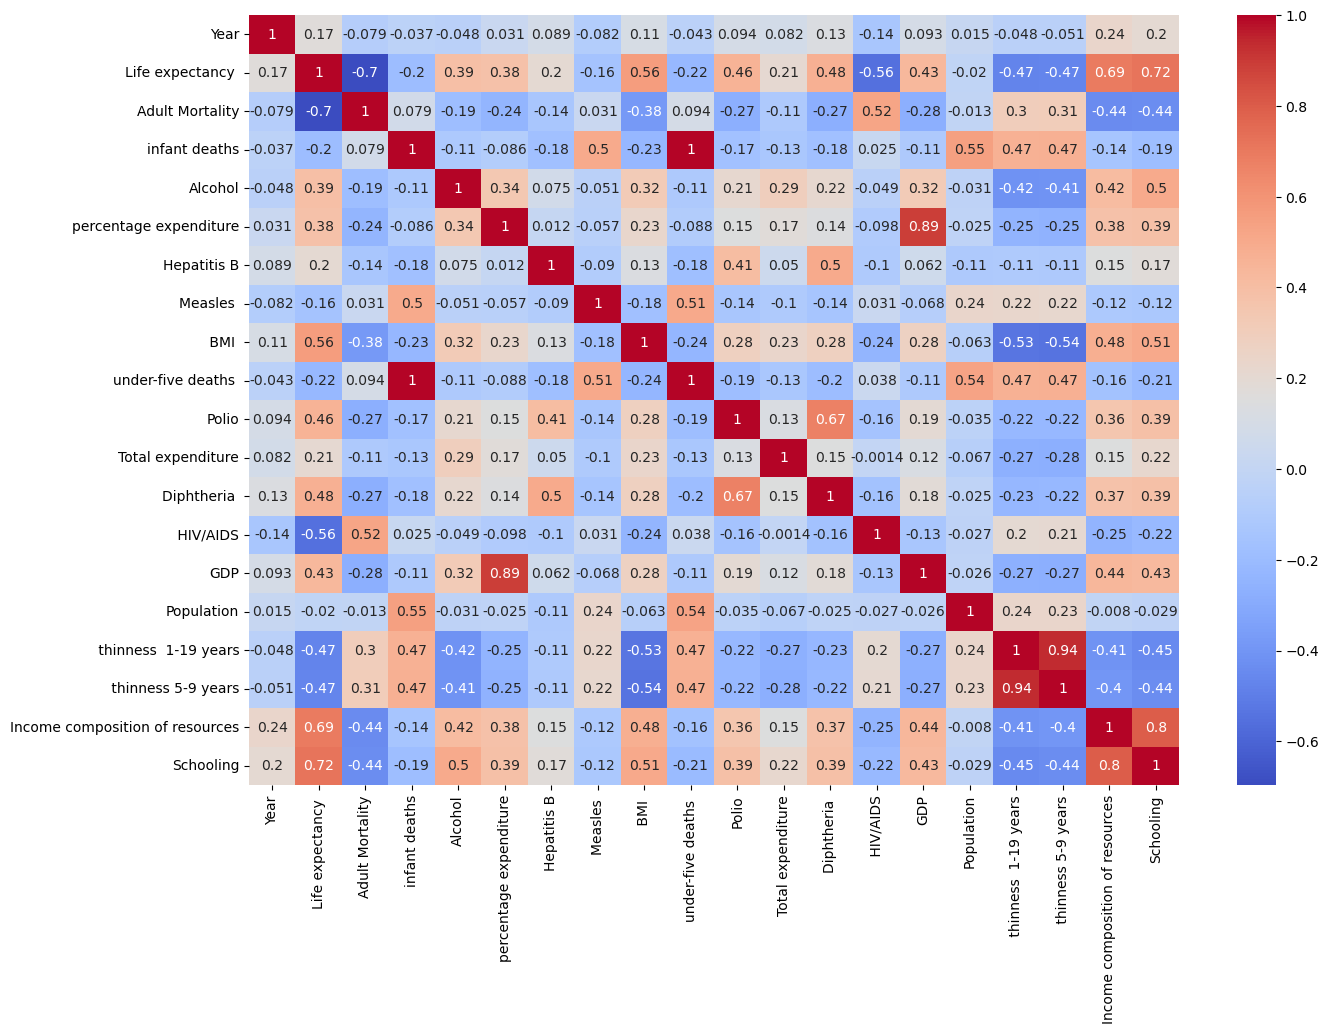

Life expectancy                    1.000000
Schooling                          0.715066
Income composition of resources    0.692483
 BMI                               0.559255
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Year                               0.169623
Population                        -0.019638
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
 thinness 5-9 years               -0.466629
 thinness  1-19 years             -0.472162
 HIV/AIDS                         -0.556457
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


In [11]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Strongest correlations with life expectancy
print(corr_matrix['Life expectancy '].sort_values(ascending=False))

#this gives r, not r squared, as r squared cannot be negative. Higher r = higher r squared. 

R-squared: 0.9688597931032505
Mean Squared Error: 2.697840447454015


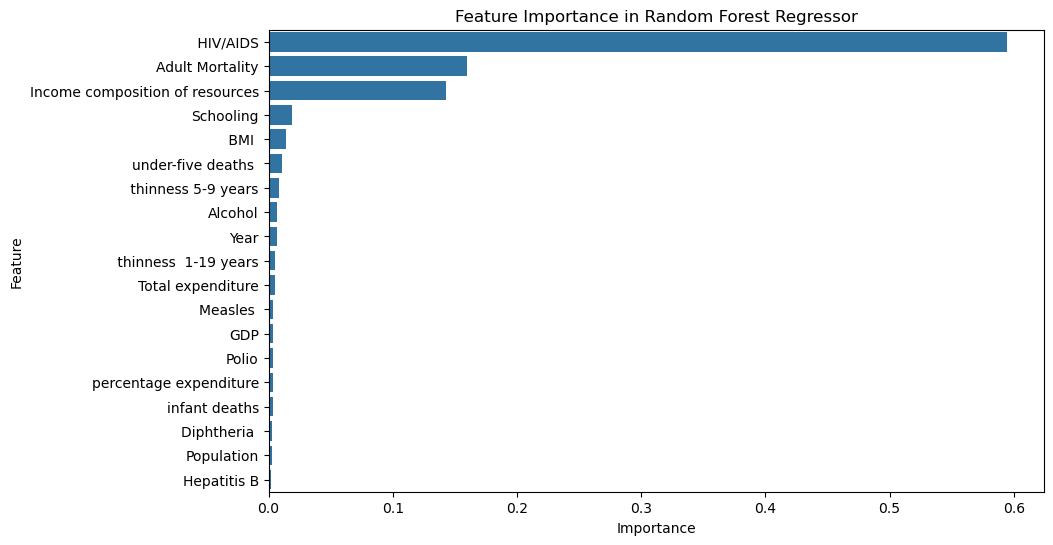

In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Select relevant features and target variables
# Predicting death rates based on vaccinations and income/wealth
X = df[[
    'Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 
    'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 
    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 
    ' thinness 5-9 years', 'Income composition of resources', 'Schooling'
]]
y = df['Life expectancy ']  # You can also use 'Adult Mortality' or 'under-five deaths'

# Step 3: Train-test split
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Random Forest Regression
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Step 5: Predictions
# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model: R-squared and Mean Squared Error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')

# Step 6: Feature Importance
# Plot feature importance to understand which variables are most important
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance and plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

In [13]:
# Print column names
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


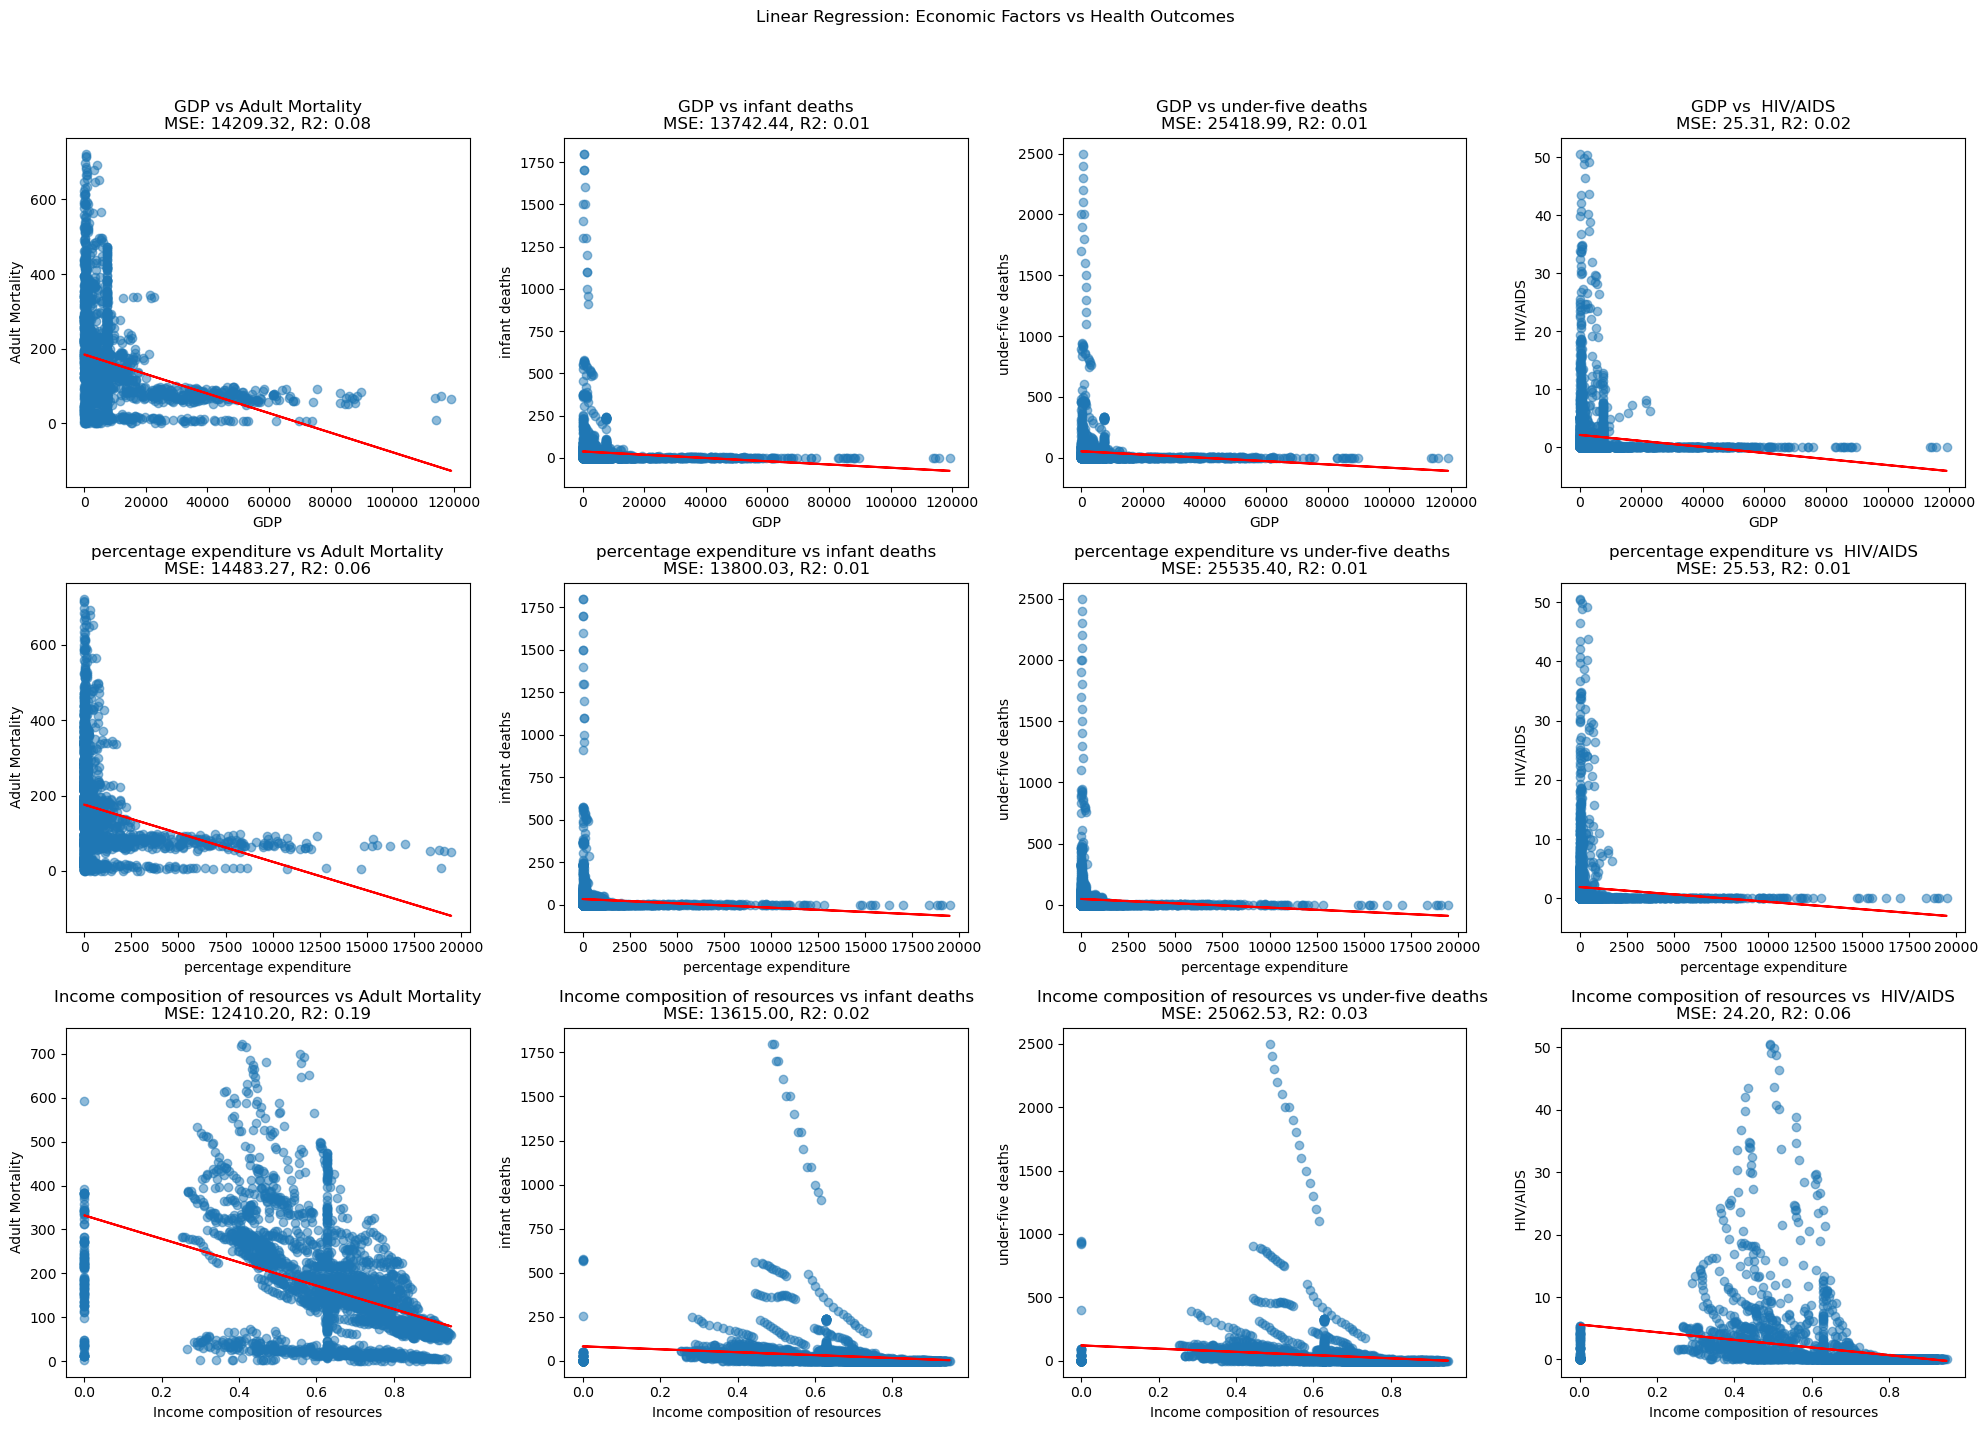

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = df
# Define the columns for economic factors and health outcomes
economic_factors = ['GDP', 'percentage expenditure', 'Income composition of resources']
health_outcomes = ['Adult Mortality', 'infant deaths', 'under-five deaths ', ' HIV/AIDS']

# Create linear regression models and plots
fig, axes = plt.subplots(nrows=len(economic_factors), ncols=len(health_outcomes), figsize=(20, 15))
fig.suptitle('Linear Regression: Economic Factors vs Health Outcomes')

for i, factor in enumerate(economic_factors):
    for j, outcome in enumerate(health_outcomes):
        X = data[[factor]].dropna()
        y = data[outcome].dropna()
        
        # Ensure X and y have the same length
        common_index = X.index.intersection(y.index)
        X = X.loc[common_index]
        y = y.loc[common_index]
        
        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Predict and calculate metrics
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        
        # Plot the results
        axes[i, j].scatter(X, y, alpha=0.5)
        axes[i, j].plot(X, y_pred, color='red')
        axes[i, j].set_xlabel(factor)
        axes[i, j].set_ylabel(outcome)
        axes[i, j].set_title(f'{factor} vs {outcome}\nMSE: {mse:.2f}, R2: {r2:.2f}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

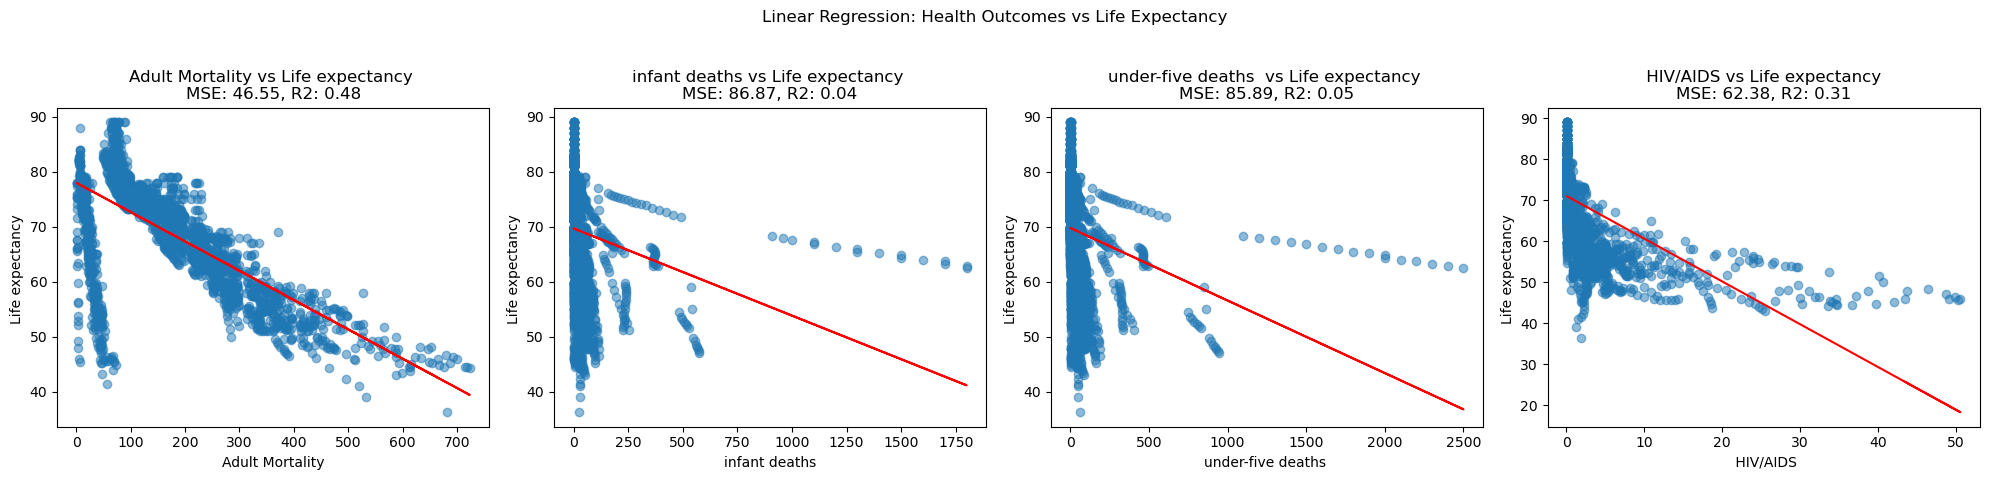

In [15]:
# Define the columns for health outcomes and life expectancy
health_outcomes = ['Adult Mortality', 'infant deaths', 'under-five deaths ', ' HIV/AIDS']
life_expectancy = 'Life expectancy '

# Create linear regression models and plots
fig, axes = plt.subplots(nrows=1, ncols=len(health_outcomes), figsize=(20, 5))
fig.suptitle('Linear Regression: Health Outcomes vs Life Expectancy')

for i, outcome in enumerate(health_outcomes):
    X = data[[outcome]].dropna()
    y = data[life_expectancy].dropna()
    
    # Ensure X and y have the same length
    common_index = X.index.intersection(y.index)
    X = X.loc[common_index]
    y = y.loc[common_index]
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict and calculate metrics
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot the results
    axes[i].scatter(X, y, alpha=0.5)
    axes[i].plot(X, y_pred, color='red')
    axes[i].set_xlabel(outcome)
    axes[i].set_ylabel(life_expectancy)
    axes[i].set_title(f'{outcome} vs {life_expectancy}\nMSE: {mse:.2f}, R2: {r2:.2f}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [16]:
developed = df[df['Status'] == 'Developed']
developing = df[df['Status'] == 'Developing']

In [17]:
print(developed[['Life expectancy ', 'GDP', 'Schooling']].mean())
print(developing[['Life expectancy ', 'GDP', 'Schooling']].mean())

Life expectancy        79.197852
GDP                 20232.107949
Schooling              15.484285
dtype: float64
Life expectancy       67.120177
GDP                 4792.531044
Schooling             11.255924
dtype: float64


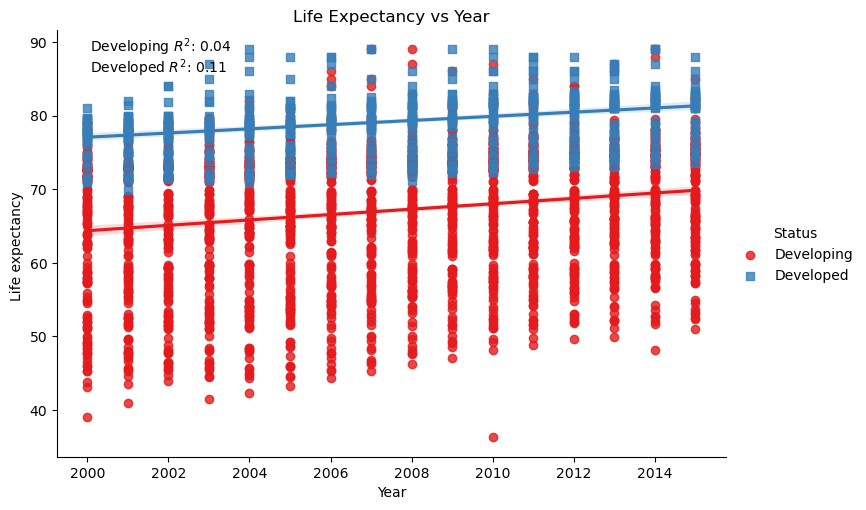

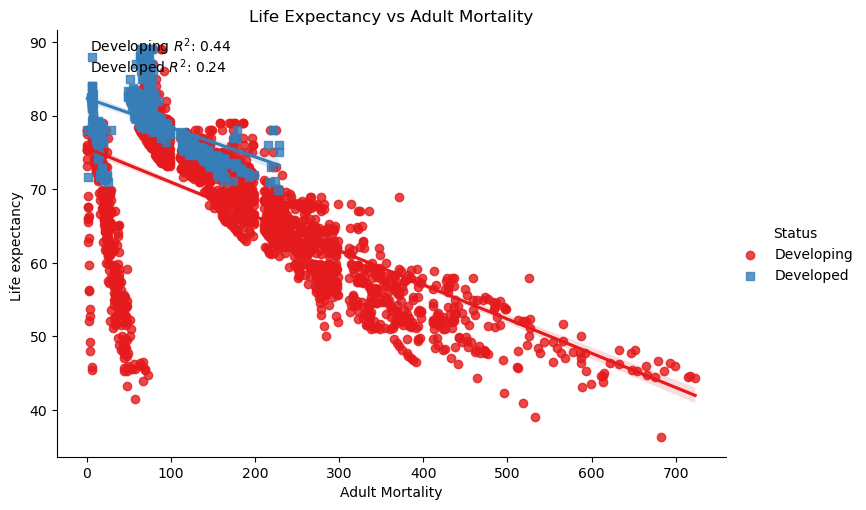

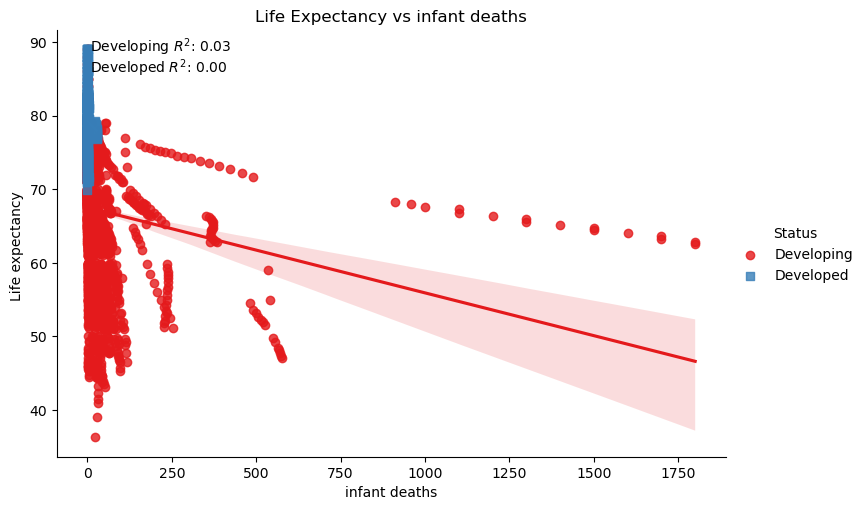

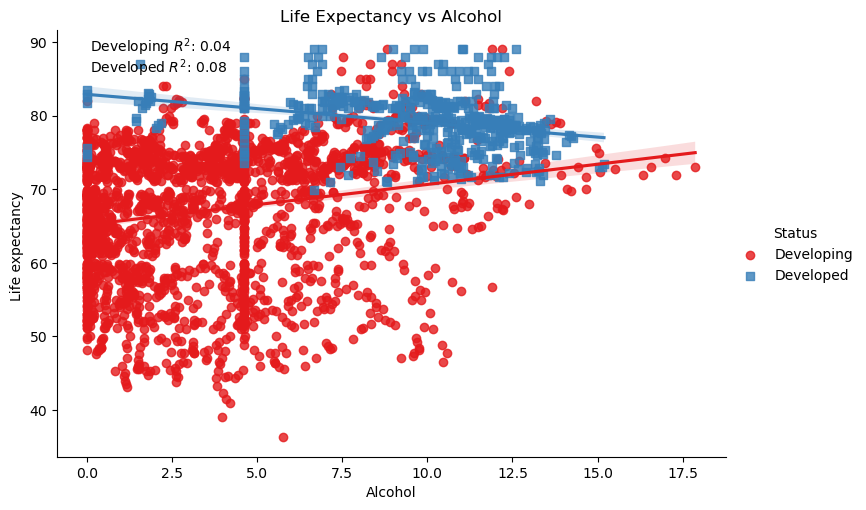

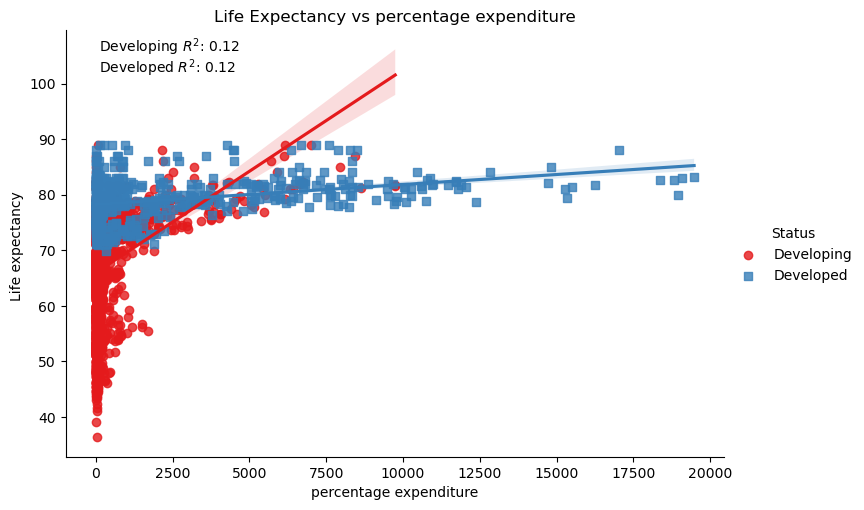

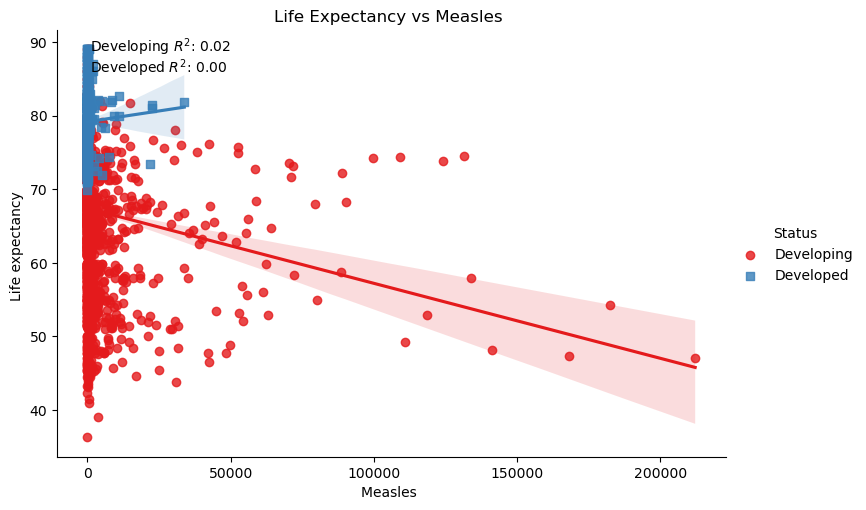

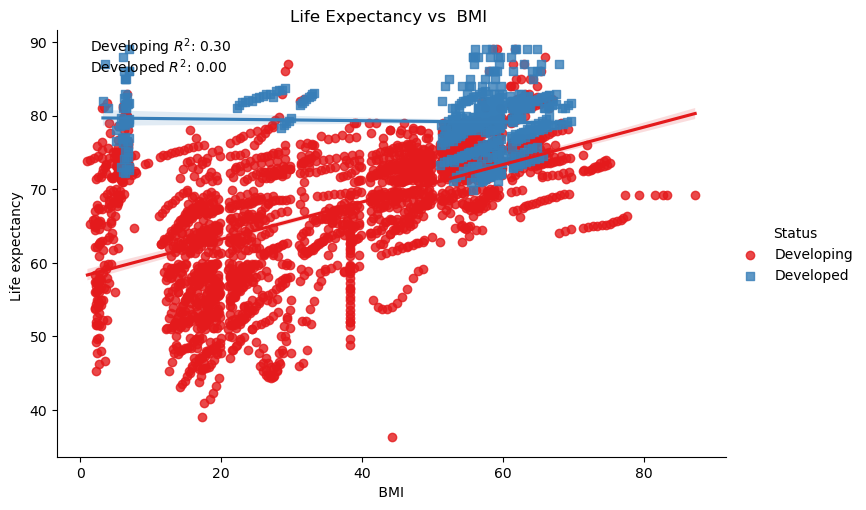

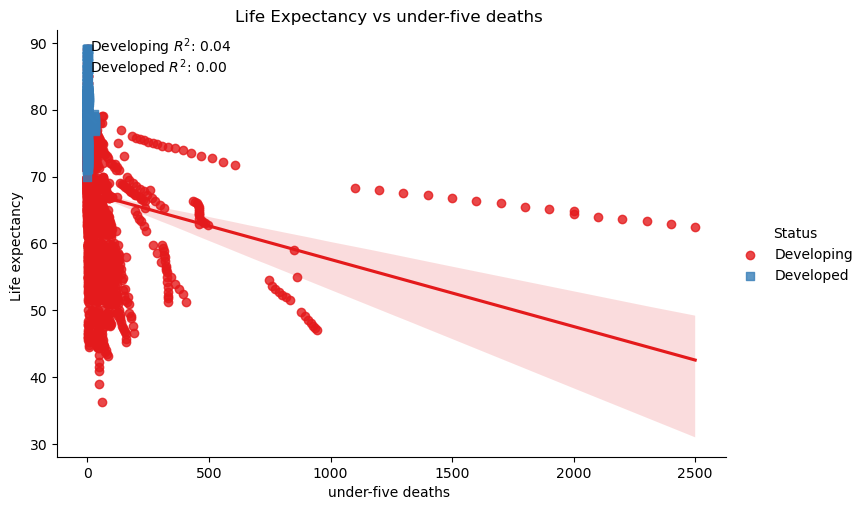

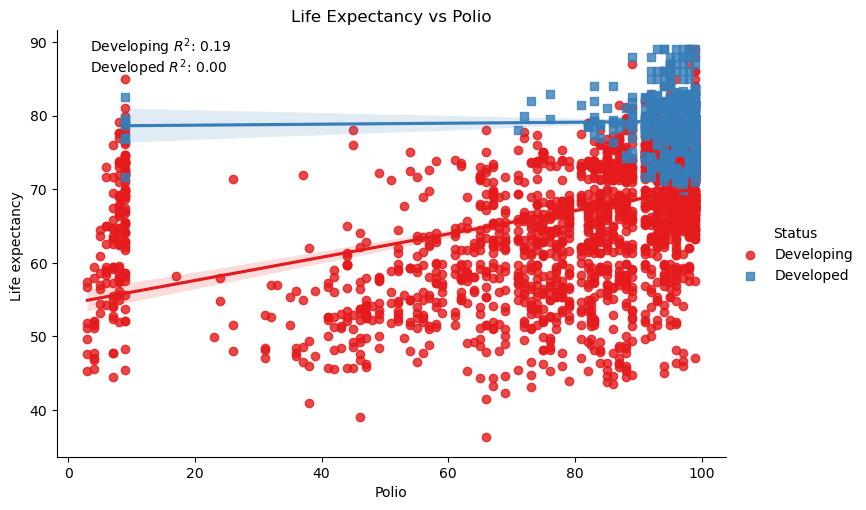

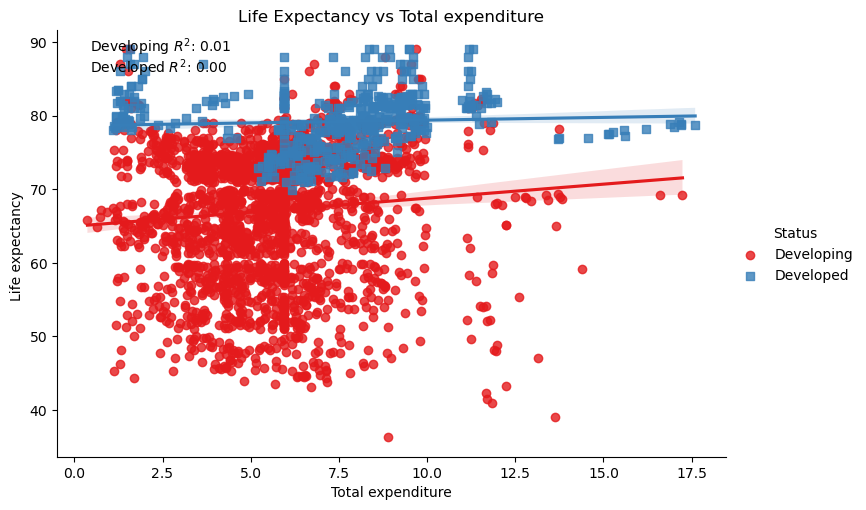

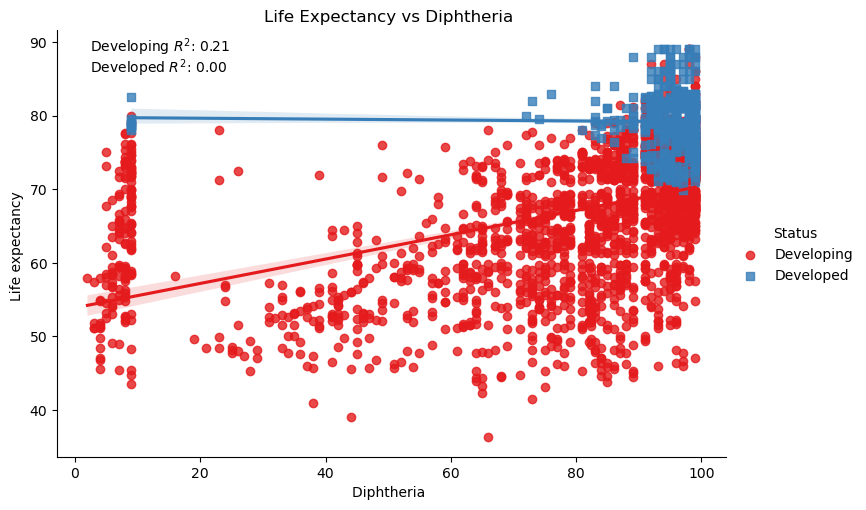

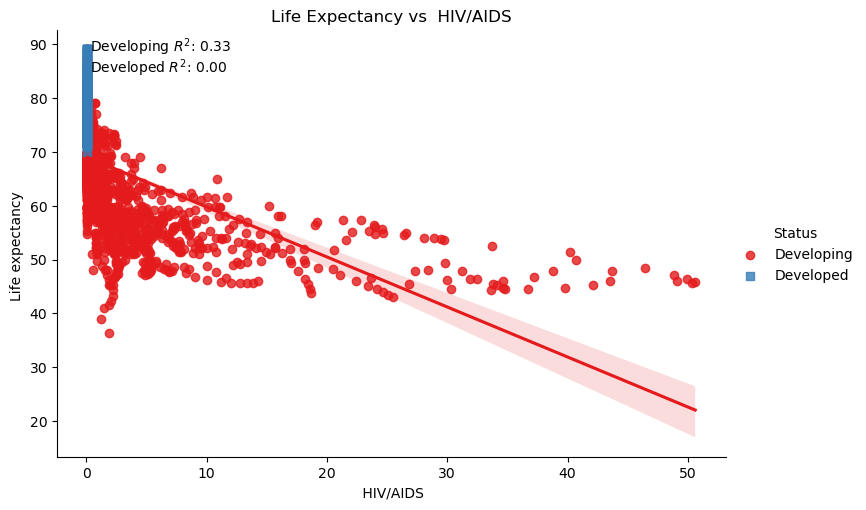

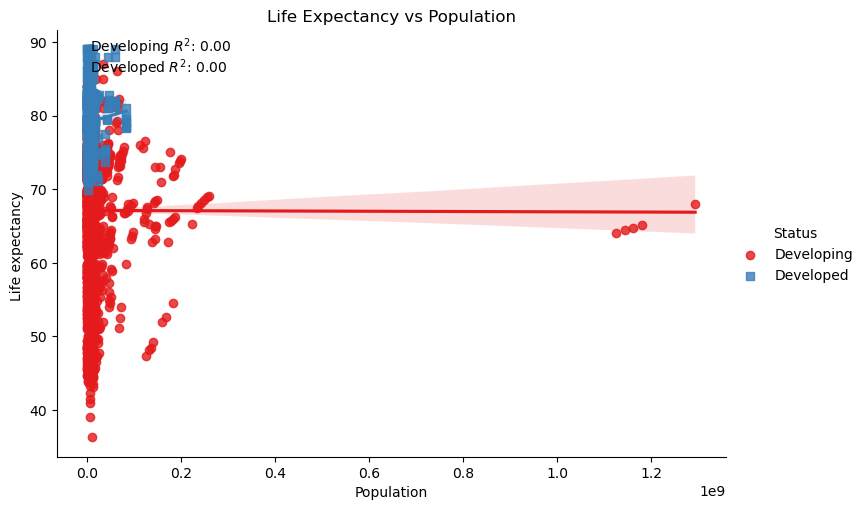

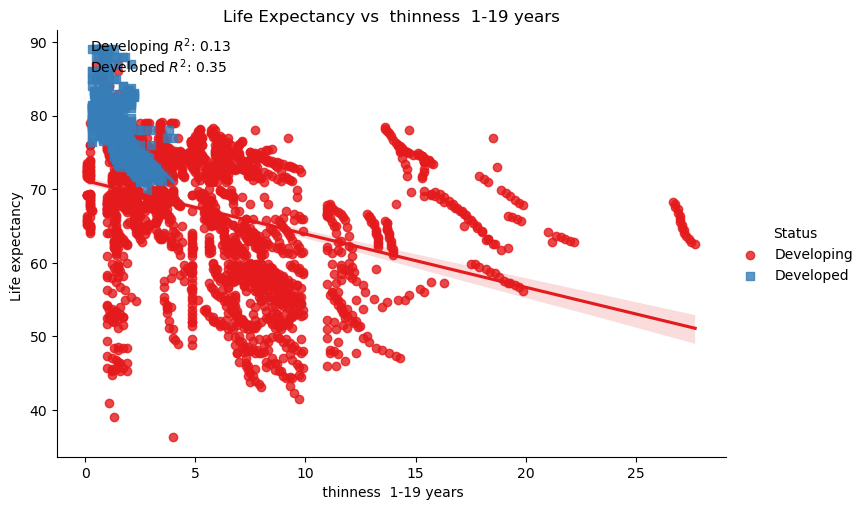

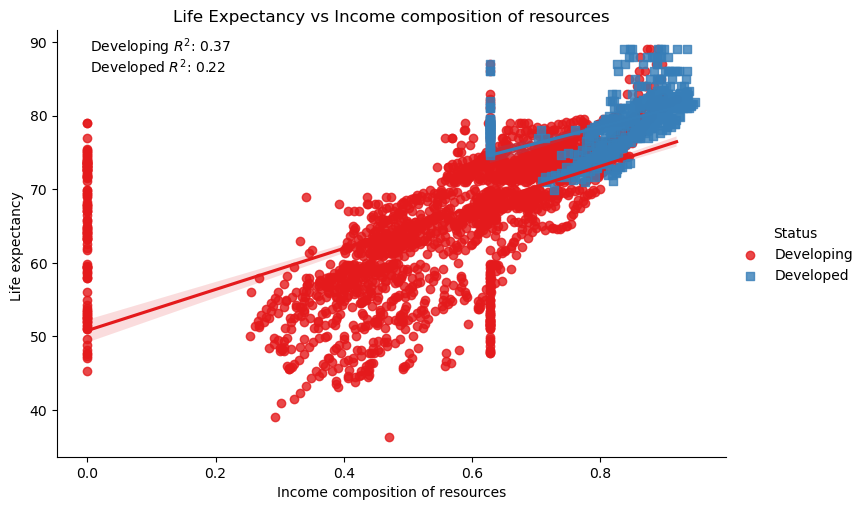

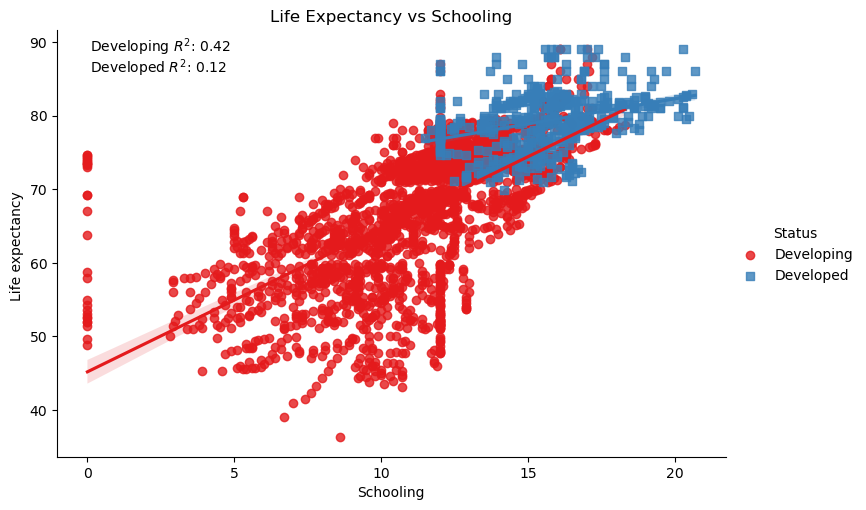

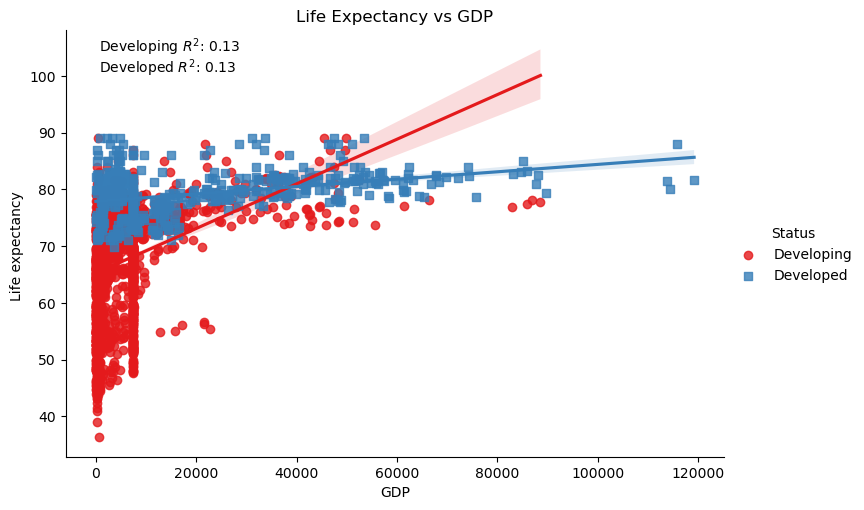

In [19]:
import statsmodels.api as sm

# Function to calculate R^2
def calculate_r2(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model.rsquared

# List of variables to plot against Life Expectancy
variables = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 
             'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 
             'Diphtheria ', ' HIV/AIDS',  'Population', ' thinness  1-19 years', 
             ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'GDP']

# Loop through each variable and create a plot
for var in variables:
    statuses = df['Status'].unique()
    r2_values = {}

    for status in statuses:
        subset = df[df['Status'] == status]
        r2 = calculate_r2(subset[var], subset['Life expectancy '])
        r2_values[status] = r2

    # Linear regression plot: Life Expectancy vs. variable with separate lines for each status
    sns.lmplot(x=var, y='Life expectancy ', hue='Status', data=df, aspect=1.5, markers=["o", "s"], palette="Set1")

    # Display R^2 values
    for status, r2 in r2_values.items():
        plt.text(0.05, 0.95 - 0.05 * list(statuses).index(status), f'{status} $R^2$: {r2:.2f}', transform=plt.gca().transAxes)

    plt.title(f'Life Expectancy vs {var}')
    plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the columns for GDP and Life Expectancy
X = df[['GDP']].fillna(0)  # Independent variable (GDP)
y = df['Life expectancy '].fillna(0)  # Dependent variable (Life Expectancy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 67.45300923660477
R-squared: 0.22141405159134064


Accuracy: 0.7857142857142857
Confusion Matrix:
 [[427  27]
 [ 99  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       454
           1       0.56      0.26      0.36       134

    accuracy                           0.79       588
   macro avg       0.69      0.60      0.61       588
weighted avg       0.76      0.79      0.75       588


Countries Predicted to Have High Hepatitis B Prevalence:
['Syrian Arab Republic', 'Kenya', 'Chad', 'Central African Republic', 'Somalia', 'Saint Lucia', 'Togo', 'Guinea', 'Mozambique', 'Cambodia', 'Cabo Verde', 'Ireland', 'India', 'Liberia', 'Ghana', 'Niger', 'Zimbabwe', 'Ethiopia', 'Uganda', 'Nigeria', 'Senegal', 'Sudan', 'Timor-Leste', 'Angola', 'Kiribati', 'New Zealand', 'Equatorial Guinea', 'Mali', 'Venezuela (Bolivarian Republic of)', "Lao People's Democratic Republic", 'Democratic Republic of the Congo', 'Cameroon', 'Iraq', 'Tuvalu', 'Samoa', 'El Salvador', 'Benin'

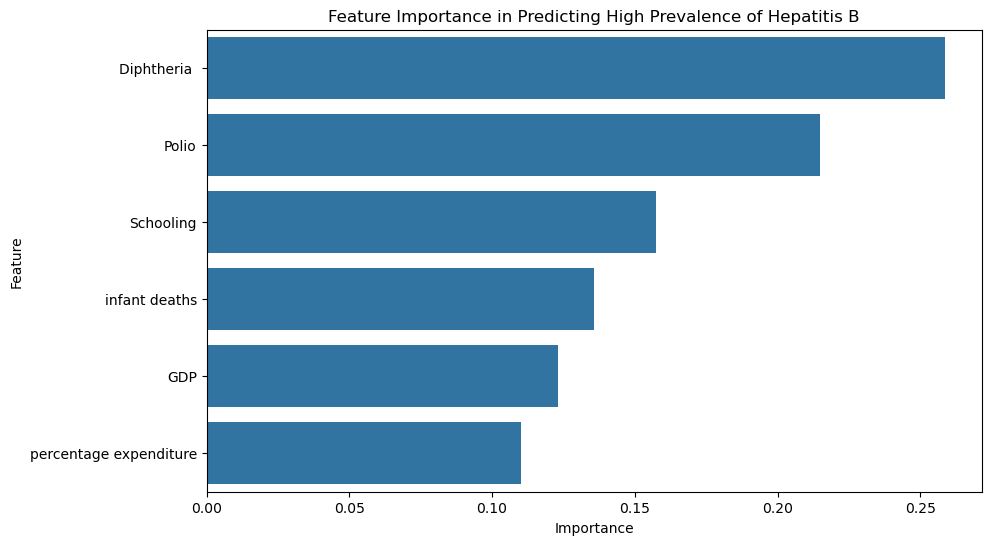

In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
df = data
# Step 2: Data Preprocessing and Define "High Prevalence" of Hepatitis B
# Define high prevalence as Hepatitis B immunization rate less than a threshold (e.g., 80%)
df['High_HBV'] = np.where(df[ 'Hepatitis B'] < 80, 1, 0)  # 1 for high prevalence, 0 for low

# Step 3: Select features and target variable
# X includes GDP, other vaccination rates, death rates, etc.
X = df[['GDP', 'Polio', 'Diphtheria ', 'percentage expenditure', 'Schooling', 'infant deaths']]
y = df['High_HBV']  # Target variable

# Step 4: Train-test split (keep track of country names in the test set)
X_train, X_test, y_train, y_test, country_train, country_test = train_test_split(
    X, y, df['Country'], test_size=0.2, random_state=42)

# Step 5: Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Step 6: Predictions
y_pred = lr.predict(X_test)

# Step 7: Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Countries with High Prevalence Predictions (Remove Duplicates)
predicted_high_hbv = country_test[y_pred == 1]  # Get country names where high prevalence was predicted

# Remove duplicates from the predicted country names
unique_countries_high_hbv = predicted_high_hbv.drop_duplicates()

# Print the list of unique country names
print("\nCountries Predicted to Have High Hepatitis B Prevalence:")
print(unique_countries_high_hbv.to_list())

# Step 9: Feature Importance (for Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Plot feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting High Prevalence of Hepatitis B')
plt.show()

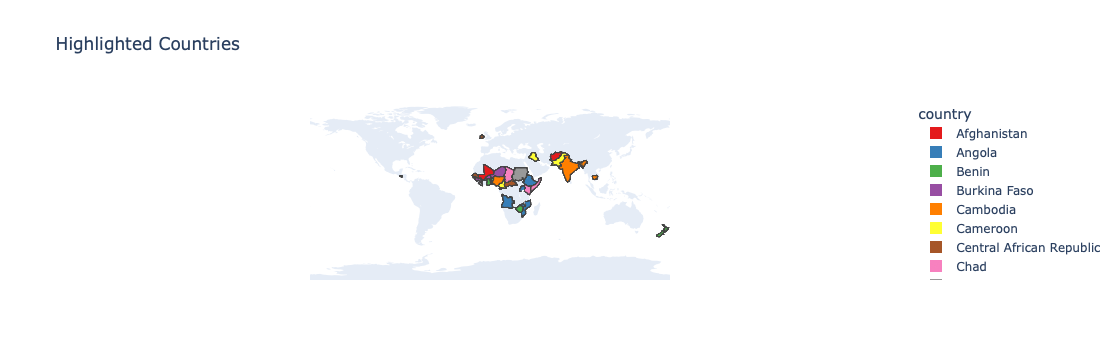

In [23]:
import plotly.express as px

# List of countries to highlight
highlight_countries = ['Syrian Arab Republic', 'Kenya', 'Chad', 'Central African Republic', 'Somalia', 'Saint Lucia', 'Togo', 'Guinea', 'Mozambique', 'Cambodia', 'Cabo Verde', 'Ireland', 'India', 'Liberia', 'Ghana', 'Niger', 'Zimbabwe', 'Ethiopia', 'Uganda', 'Nigeria', 'Senegal', 'Sudan', 'Timor-Leste', 'Angola', 'Kiribati', 'New Zealand', 'Equatorial Guinea', 'Mali', 'Venezuela (Bolivarian Republic of)', "Lao People's Democratic Republic", 'Democratic Republic of the Congo', 'Cameroon', 'Iraq', 'Tuvalu', 'Samoa', 'El Salvador', 'Benin', 'Tonga', 'Pakistan', 'Burkina Faso', 'Afghanistan']

# Create a DataFrame with the countries to highlight
df = px.data.gapminder().query("country in @highlight_countries")

# Create a world map highlighting the specified countries
fig = px.choropleth(df, locations="iso_alpha", color="country",
                    hover_name="country", title="Highlighted Countries",
                    color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout for better visualization
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

# Show the plot
fig.show()

In [24]:
#the above matches the actual prevalance map very well https://www.cdc.gov/hepatitis/global/index.htm